<a href="https://colab.research.google.com/github/onuralpArsln/finTech/blob/main/sarima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import requests

def getMassData(lastDay=1):
    url = 'https://api.binance.com/api/v3/klines'
    current_time = int(time.time() * 1000)
    startDay = current_time - ((lastDay + 364) * 24 * 60 * 60 * 1000)
    endDay = current_time - (lastDay * 24 * 60 * 60 * 1000)

    params = {
        'symbol': 'BTCUSDT',      # The trading pair you're interested in
        'interval': '1h',         # 1-hour candlestick data (hourly prices)
        'startTime': startDay,    # Data from 300 days ago
        'endTime': endDay,        # Data until lastDay
        'limit': 960             # Maximum number of data points per request
    }

    print(endDay - startDay)
    result = []
    while  startDay <  endDay - 86400000:
        time.sleep(1)
        print("calisyom")
        print(startDay)

        response = requests.get(url, params=params)
        data = response.json()
        print(data[-1:])

        if not data:  # Break if no more data is returned
            break

        for candle in data:
            close_price = candle[4]
            result.append(close_price)

        # Update startTime for the next request to get older data
        # The last candle's timestamp will be used to set the new startTime
        startDay = data[-1][0]  # Get the timestamp of the last candle
        params['startTime'] = startDay  # Set the new start time

    return result


In [ ]:
import csv

import pandas as pd

data = getMassData()

test_data = data[-10:]

train_data = data[:-10]


df = pd.DataFrame(data)

print("Size (shape):", df.shape)

df.to_csv('data/massData.csv', index=False, header=False)

31449600000
calisyom
1695476962075
[[1698930000000, '35351.12000000', '35367.11000000', '34680.00000000', '34926.96000000', '4493.79779000', 1698933599999, '157505329.83909820', 128024, '2103.25239000', '73714995.35326520', '0']]
calisyom
1698930000000
[[1702382400000, '41584.58000000', '41906.45000000', '41584.57000000', '41849.99000000', '1356.41499000', 1702385999999, '56670118.44096610', 53532, '746.48182000', '31187165.64148030', '0']]
calisyom
1702382400000
[[1705834800000, '41786.00000000', '41795.61000000', '41686.00000000', '41719.89000000', '401.37890000', 1705838399999, '16760023.31858480', 25127, '175.49606000', '7328293.97013910', '0']]
calisyom
1705834800000
[[1709287200000, '62129.14000000', '62188.00000000', '61859.29000000', '61991.11000000', '1774.98071000', 1709290799999, '110114669.61051010', 60737, '755.33864000', '46863145.65896760', '0']]
calisyom
1709287200000
[[1712739600000, '69011.92000000', '69171.75000000', '68902.43000000', '69139.20000000', '642.38466000'

In [1]:
import csv

import pandas as pd
url = "https://raw.githubusercontent.com/onuralpArsln/finTech/refs/heads/main/data/massData.csv"


df= pd.read_csv(url, header=None)
data=df.values.tolist()
single_dimensional_list = [item[0] for item in data]


In [2]:
data=single_dimensional_list

print(len(data))

test_amount = 50

test_data = data[-test_amount:]

train_data = data[:-test_amount]

8745


In [3]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
data = train_data  # Replace with your data

# Ensure the data is fully numeric and clean up any non-numeric entries
# Convert data to a Pandas Series first
df = pd.Series(data)

# Attempt to convert all values to numeric, coercing non-numeric values to NaN
df = pd.to_numeric(df, errors='coerce')

# Drop any NaN values that were caused by non-numeric entries
df = df.dropna()

# Check if the conversion and cleaning worked
if df.isnull().values.any():
    raise ValueError("The data still contains non-numeric values after conversion.")

# Fit the SARIMAX model (adjust p, d, q, and seasonal parameters as needed)
model = SARIMAX(df, order=(5, 1, 2), seasonal_order=(1, 1, 1, 12))  # Adjust the order if necessary
model_fit = model.fit(disp=False)

# Forecast the next 10 values
forecast = model_fit.forecast(steps=test_amount)

# Print the forecasted values
print(forecast.to_list())
print(test_data)




[62597.87899584823, 62606.19561309198, 62588.77091261573, 62606.212955486284, 62600.014490497386, 62625.187850526134, 62642.38511103743, 62642.07729934751, 62658.96928418234, 62619.8440891804, 62605.70100746038, 62605.248039138845, 62607.971470371944, 62612.93373117856, 62618.53727514769, 62625.85670219992, 62616.639657221596, 62631.236506918875, 62649.60566468871, 62655.90359233167, 62656.647075697016, 62651.665519457834, 62643.108097058284, 62671.99769189707, 62670.16951903078, 62675.39234181682, 62678.902238182214, 62687.092831061695, 62678.13104779976, 62693.64029932493, 62711.88713771329, 62717.54845516174, 62719.73166355298, 62711.630716807915, 62702.55352471931, 62728.75694021231, 62727.3233355776, 62732.48259011094, 62736.16568317849, 62744.237944038476, 62735.237815951536, 62750.62530861677, 62768.86810464591, 62774.54762576457, 62776.58619620339, 62768.727610502945, 62759.68271818593, 62786.08971544636, 62784.606213163985, 62789.7328500734]
[62924.07, 63035.98, 62935.83, 6315

In [4]:
forecast_list = forecast.to_list()


list1 = [float(value) for value in forecast_list]
list2 = [float(value) for value in test_data]

"""
for i in range(len(list1)):
    print(int(list1[i]) - int(list2[i]))
"""

'\nfor i in range(len(list1)):\n    print(int(list1[i]) - int(list2[i]))\n'

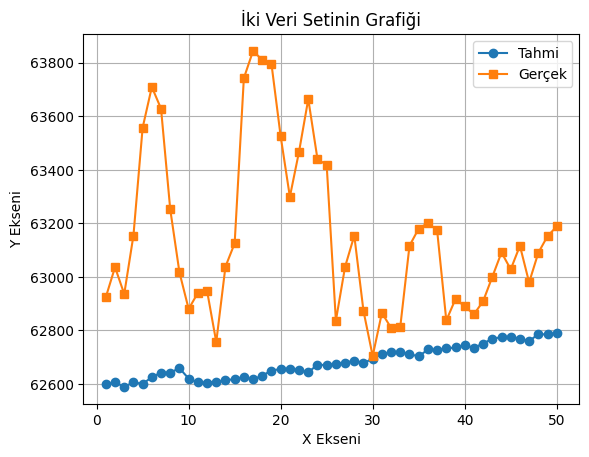

In [5]:
import matplotlib.pyplot as plt

# Örnek veriler
y1 = list1  # İlk Y ekseni verileri
y2 = list2   # İkinci Y ekseni verileri

# X eksenini otomatik olarak oluştur
x = range(1, len(y1) + 1)  # 1'den başlayarak y1'in uzunluğu kadar

# Grafiği çiz
plt.plot(x, y1, marker='o', label='Tahmi')  # İlk veri seti
plt.plot(x, y2, marker='s', label='Gerçek')  # İkinci veri seti

# Grafik özellikleri
plt.title('İki Veri Setinin Grafiği')  # Grafik başlığı
plt.xlabel('X Ekseni')  # X ekseni etiketi
plt.ylabel('Y Ekseni')  # Y ekseni etiketi
plt.legend()  # Legend ekle
plt.grid(True)  # Izgara çizgilerini göster
plt.show()  # Grafiği göster



**LSTM DENEMECESİ BURALAR** CHATGPT

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [40]:
# Örnek veri (son 1 yılın saatlik verisi) -> [timestamp, close_price]
# Bu verileri normalleştirmek için MinMaxScaler kullanıyoruz.
datal = np.array([data]).reshape(-1,1)  # verinizi numpy array'e çevirin

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(datal)

# Eğitim verisi hazırlama
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# LSTM için veriyi zaman serisi formuna dönüştürme
def create_dataset(datal, time_step=5000):
    X, y = [], []
    for i in range(len(datal) - time_step):
        X.append(datal[i:i + time_step, 0])
        y.append(datal[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 148  # Geçmiş 60 saatlik veriyi kullanarak tahmin yapacağız
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Veriyi LSTM'in kabul edeceği 3D şekle getirme (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [41]:
# Modelin oluşturulması
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Modelin derlenmesi
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
# Modeli eğitme
model.fit(X_train, y_train, batch_size=32, epochs=30)


Epoch 1/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 5.4846e-05
Epoch 2/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 5.5775e-05
Epoch 3/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 5.3487e-05
Epoch 4/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 7.3956e-05
Epoch 5/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4.8080e-05
Epoch 6/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 5.7697e-05
Epoch 7/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 5.4830e-05
Epoch 8/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4.8314e-05
Epoch 9/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 5.5017e-05
Epoch 10/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 5.6563e-05
Epoch 11/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 5.0488e-05
Epoch 12/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 6.1929e-05
Epoch 13/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 5.9681e-05
Epoch 14/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss

**BU BLOK ÇOK SAÇMA BİR TAHMİN YAPIYOR TAM KAFASINA GİREMEDİM**

In [45]:

#SAÇMA Bİ BLOK OLDU BU 24 SAAT SONRASINI MUM OLARAK TAHMİNLEMESİ İÇİN AMA YANİ 200BİN DOLAR NE AQ

# Son 60 veriyi alıp bir gün boyunca tahmin yapma
last_60_days = np.array(data[-60:])  # NumPy array'e çevirme
scaled_last_60_days = scaler.transform(last_60_days.reshape(-1, 1))

# Bir gün boyunca tahminler için boş bir liste oluşturma
future_predictions = []

# 24 saat (24 tahmin) boyunca döngü
for _ in range(24):
    X_input = scaled_last_60_days.reshape(1, -1, 1)  # 3D forma dönüştürme
    next_hour_prediction = model.predict(X_input)  # Saatlik tahmin yapma
    next_hour_prediction = scaler.inverse_transform(next_hour_prediction)  # Orijinal fiyatlara çevirme

    # Tahmin edilen değeri listeye ekleme
    future_predictions.append(next_hour_prediction[0][0])

    # Yeni tahmin ile giriş verisini güncelleme
    scaled_last_60_days = np.append(scaled_last_60_days[1:], next_hour_prediction)  # Eski verinin en başına ekleme

# Sonuçları yazdırma
print("Gelecek 24 saat için tahminler:")
for i, pred in enumerate(future_predictions):
    print(f"Saat {i+1}: {pred:.2f} USD")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Gelecek 24 saat için tahminler:
Saat 1: 62984.43 USD
Saat 2: 189358.12 USD
Saat 3: 2020

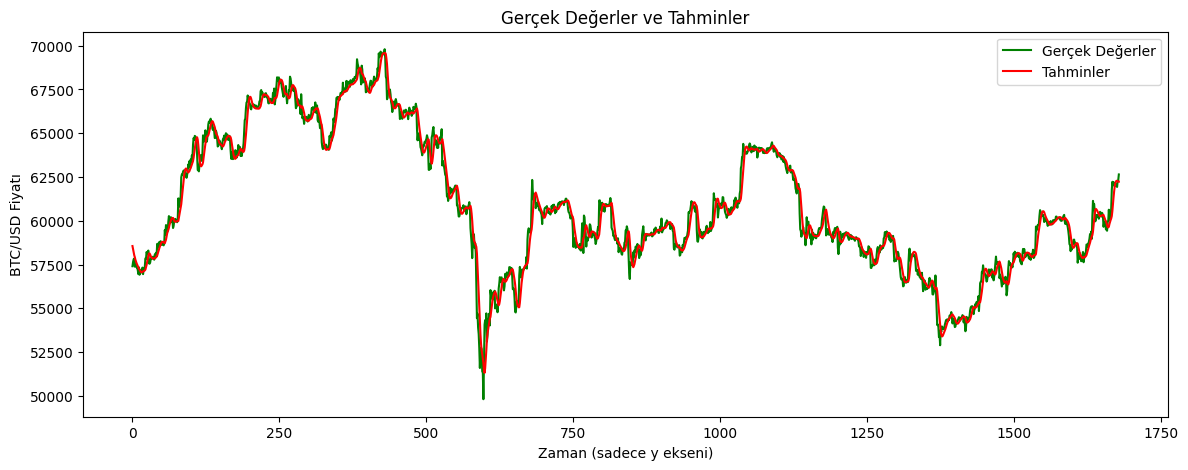

In [52]:
# Sadece tahmin ve gerçek değerleri çizdirme
plt.figure(figsize=(14, 5))
plt.plot(true_values, color='green', label='Gerçek Değerler')
plt.plot(predictions, color='red', label='Tahminler')
plt.legend()
plt.title('Gerçek Değerler ve Tahminler')
plt.ylabel('BTC/USD Fiyatı')
plt.xlabel('Zaman (sadece y ekseni)')  # Y eksenine açıklama ekleyebiliriz
plt.show()


In [31]:
# Test setinden gerçek değerleri alıyoruz (tahminlere uygun olan kısmı seçiyoruz)
true_values = scaler.inverse_transform(test_data[time_step:])  # Zaman adımı kadar kaydırma yapılır

# Tahminler ve gerçek değerler için tablo oluşturuyoruz
comparison = pd.DataFrame({'Gerçek Değerler': true_values.flatten(), 'Tahminler': predictions.flatten(), 'fark': true_values.flatten() - predictions.flatten()})

comparison['fark'] = comparison['fark'].abs()
# İlk 10 değeri gösterelim
print(comparison.tail(10))

print(comparison['fark'].max())
print(comparison['fark'].min())



# İsterseniz tüm tabloyu da gösterebilirsiniz
# print(comparison)

      Gerçek Değerler     Tahminler        fark
1669         62204.32  61335.085938  869.234062
1670         62117.99  61682.464844  435.525156
1671         62082.00  61953.550781  128.449219
1672         61990.42  62140.609375  150.189375
1673         62020.60  62240.156250  219.556250
1674         62093.99  62279.105469  185.115469
1675         61932.00  62285.152344  353.152344
1676         62272.01  62243.859375   28.150625
1677         62320.01  62229.460938   90.549063
1678         62645.44  62232.484375  412.955625
3690.603906250006
0.048593749990686774
